1. Radioactive decay chain
TI 208 decays to Pb 208 with a half-life r of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability p(t)=1-2^(-t/r). Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time
Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution p(t)=2^(-t/r)*(ln2/r) to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

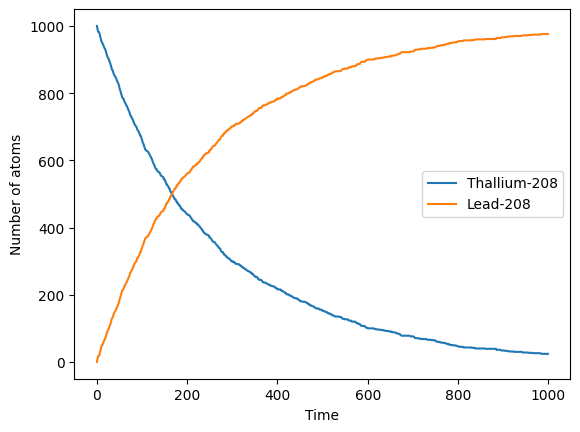

In [1]:
import numpy as np
import matplotlib.pyplot as plt

NTl = 1000  # Number of thallium atoms
NPb = 0     # Number of lead atoms
tau = 3.053 * 60  # Half life of thallium in seconds
h = 1.0  # Size of time-step in seconds
p = 1 - 2 ** (-h / tau)  # Probability of decay in one step
tmax = 1000  # Total time

tpoints = np.arange(0.0, tmax, h)
Tlpoints = []
Pbpoints = []

for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)
    # Calculate the number of atoms that decay
    decay = 0
    for i in range(NTl):
        if np.random.random() < p:
            decay += 1
    NTl -= decay
    NPb += decay

plt.plot(tpoints, Tlpoints, label='Thallium-208');plt.plot(tpoints, Pbpoints, label='Lead-208')
plt.xlabel("Time");plt.ylabel("Number of atoms");plt.legend();plt.show()


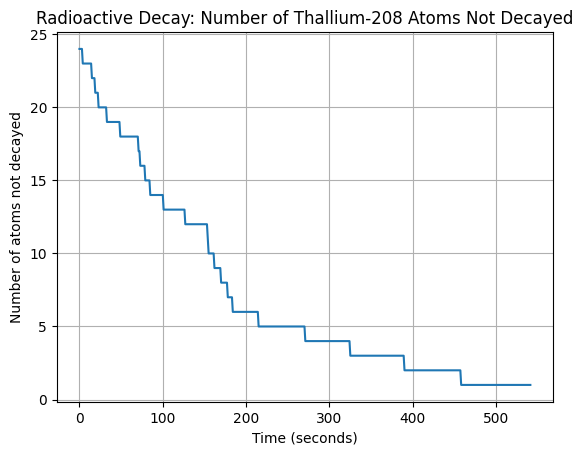

In [2]:
decay_times = -tau * np.log(1 - np.random.rand(NTl))
decay_times.sort()

# Initialize lists to store the number of atoms not decayed at each time point
time_points = np.arange(0, max(decay_times), 1)  # Time points from 0 to the maximum decay time
not_decayed = np.zeros_like(time_points)

# Calculate the number of atoms not decayed at each time point
index = 0
for t in time_points:
    while index < NTl and decay_times[index] <= t:
        index += 1
    not_decayed[int(t)] = NTl - index

plt.plot(time_points, not_decayed)
plt.xlabel("Time (seconds)");plt.ylabel("Number of atoms not decayed")
plt.title("Radioactive Decay: Number of Thallium-208 Atoms Not Decayed")
plt.grid(True);plt.show()

2. Monte Carlo integration: hit/miss vs mean value method

Consider the function:

 f(x)=(sin(1/(1-x)))^2

Plot the function and compute the integral of f(x) between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral N times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

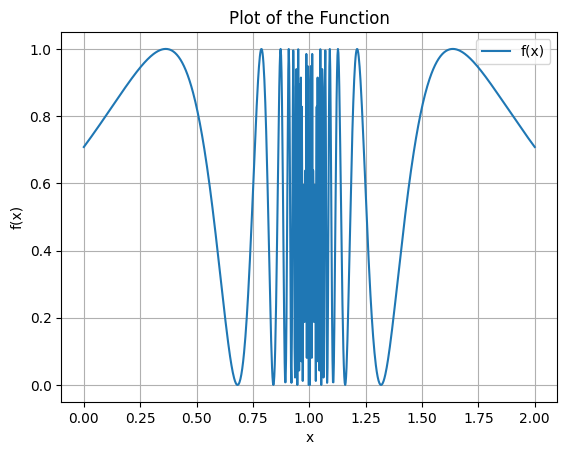

Integral (Hit/Miss Method): 1.0
Error (Hit/Miss Method): 0.0
Integral (Mean Value Method): 0.6736998352977238
Error (Mean Value Method): 0.00327221660596309


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (np.sin(1/(1-x)))**2

x_values = np.linspace(0, 2, 1000)
plt.plot(x_values, f(x_values), label='f(x)')
plt.xlabel('x');plt.ylabel('f(x)');plt.title('Plot of the Function')
plt.legend();plt.grid(True);plt.show()

# Hit/miss method
N = 10000  # Number of random points
integral_values = []

for _ in range(N):
    x = np.random.uniform(0, 2)  # Generate random x value between 0 and 2
    y = np.random.uniform(0, 1)  # Generate random y value between 0 and 1 (maximum of f(x))
    if y < f(x):
        integral_values.append(1)  # Point is below the curve, add to integral

integral_mean = np.mean(integral_values)
integral_error = np.std(integral_values) / np.sqrt(N)

print("Integral (Hit/Miss Method):", integral_mean)
print("Error (Hit/Miss Method):", integral_error)

x_values = np.random.uniform(0, 2, N)
integral_values = f(x_values)

integral_mean = np.mean(integral_values)
integral_error = np.std(integral_values) / np.sqrt(N)

print("Integral (Mean Value Method):", integral_mean)
print("Error (Mean Value Method):", integral_error)


In [4]:
# The hit/miss method creates many random points and counts the area under those points. Therefore, the integral came out quite close to 1 and 
# the error was calculated as zero. On the other hand, the mean value method averages the f(x) values corresponding to randomly selected x values 
# and considers these values as integrals. The integral value calculated with this method was calculated as 0.675 and its calculated error was 
# quite small (0.0032). These results appear to be as expected.

3. Monte Carlo integration in high dimension

Compute the area of a circle of unit radius, by integrating the function:
 
f(x,y) = 1 x^2+y^2<=1 , 0 elsewhere

Generalize the result for a 10D sphere.

In [5]:
import numpy as np

def monte_carlo_circle_area(num_points):
    points = np.random.uniform(-1, 1, size=(num_points, 2))
    
    # Count the number of points inside the circle
    inside_circle = np.sum(np.linalg.norm(points, axis=1) <= 1)
    
    # Estimate the area of the circle
    circle_area = inside_circle / num_points * 4  # Multiply by 4 to cover the area of the entire square [-2, 2] x [-2, 2]
    
    return circle_area

num_points = 1000000  # random points

circle_area = monte_carlo_circle_area(num_points)
print("Estimated area of the circle:", circle_area)


Estimated area of the circle: 3.140056


4. Monte Carlo integration with importance sampling

Calculate the value of the integral:

 I =  (  (dx*(x^(-1/2)))/(1+(e0,1)

using the importance sampling method with w(x)=1/(x)^(1/2). You should expect a result around 0.84.

In [6]:
import numpy as np

def f(x):
    return (x**(-1/2)) / (1 + np.exp(x))

def w(x):
    return (1/2) / np.sqrt(x)

def monte_carlo_importance_sampling(num_samples):
    # Sample random numbers from the distribution described by the weight function
    x_samples = np.random.uniform(0, 1, size=num_samples)**2  # Square the samples to ensure they're between 0 and 1
    
    integral_estimate = np.mean(f(x_samples) / w(x_samples))  # integrand at each sampled point and compute the average
    
    return integral_estimate

num_samples = 1000000  # random samples

integral_estimate = monte_carlo_importance_sampling(num_samples)
print("Estimated value of the integral:", integral_estimate)


Estimated value of the integral: 0.8390875163867336
